In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Importing the dataset
kyphosis = pd.read_csv('kyphosis.csv')

In [3]:
# Extracting the independent variables
x= kyphosis.drop('Kyphosis',axis=1)

In [4]:
# Extarcting the dependent variable
y = kyphosis['Kyphosis']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


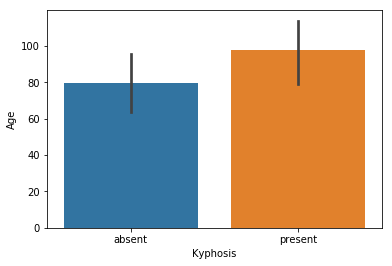

In [5]:
# Data Analysis
sns.barplot(x= 'Kyphosis', y = 'Age', data = kyphosis)

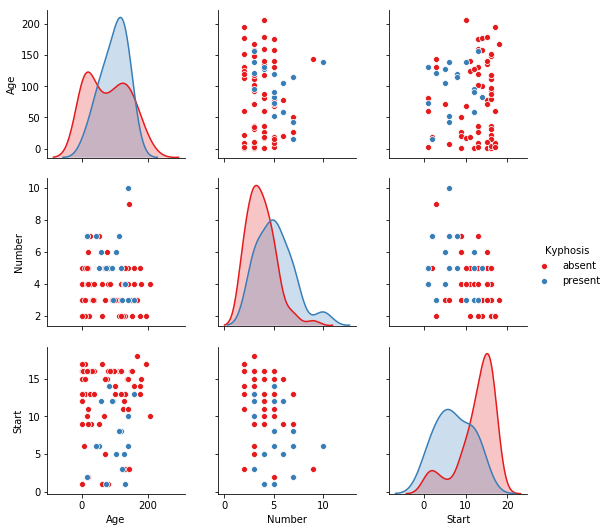

In [6]:
sns.pairplot(kyphosis, hue='Kyphosis', palette='Set1')

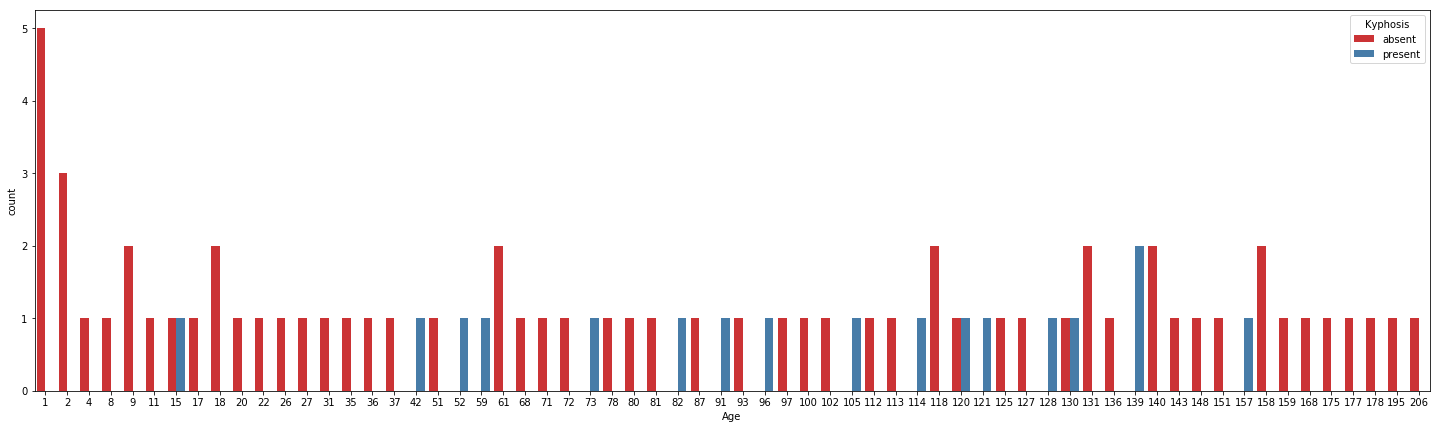

In [7]:
# Visualising the dataset
plt.figure(figsize=(25,7))
sns.countplot(x='Age', hue='Kyphosis', data=kyphosis,palette='Set1')

In [9]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [10]:
X=kyphosis.drop('Kyphosis', axis=1)
y=kyphosis['Kyphosis']

In [11]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [12]:
x=kyphosis.iloc[:,[1,2,3]].values

In [13]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [17]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
rfc_pred = rfc.predict(X_test)

In [20]:
# Evaluation of the model
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,rfc_pred))

[[18  4]
 [ 3  0]]


In [22]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.82      0.84        22
     present       0.00      0.00      0.00         3

   micro avg       0.72      0.72      0.72        25
   macro avg       0.43      0.41      0.42        25
weighted avg       0.75      0.72      0.74        25

